In [11]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

In [12]:
def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

In [13]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [5, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.sigmoid(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

In [14]:
# Loading the dataset
dataset = pd.read_csv('DatasetFinal.csv')

In [15]:
# Split data to train and test
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean')
#imputer = imputer.fit(dataset)
dataset_r8 = imputer.fit_transform(dataset)
dataset_r8 = pd.DataFrame(dataset_r8)

X = dataset_r8.iloc[:,:5]
y = dataset_r8.iloc[:,5:]

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)
y = sc_X.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)
X_train, X_test, Y_train, Y_test  = X_train.transpose(), X_test.transpose(), Y_train.transpose(), Y_test.transpose()

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 160
number of test examples = 18
X_train shape: (5, 160)
Y_train shape: (10, 160)
X_test shape: (5, 18)
Y_test shape: (10, 18)


/Users/rajathsvasisth/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, 5 inputs
    n_y -- scalar, number of classes (from 0 to 9, so -> 10)
    """

    X = tf.placeholder(tf.float32,[n_x,None])
    Y = tf.placeholder(tf.float32,[n_y,None])
    
    return X, Y

In [17]:
X, Y = create_placeholders(5, 10)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(5, ?), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(10, ?), dtype=float32)


In [18]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 5]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [10, 12]
                        b3 : [10, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   
        
    W1 = tf.get_variable("W1",[25,5],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1",[25,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2",[12,25],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2",[12,1],initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3",[10,12],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3",[10,1],initializer=tf.zeros_initializer())


    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [19]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1 = <tf.Variable 'W1:0' shape=(25, 5) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [20]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
             
    Z1 = tf.add(tf.matmul(W1,X),b1)                                              
    A1 = tf.nn.relu(Z1)                                              
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                               
    A2 = tf.nn.relu(Z2)                                              
    Z3 = tf.add(tf.matmul(W3,A2),b3)                                             
    
    return Z3

In [21]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(5, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(10, ?), dtype=float32)


In [22]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (10, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    predictions = tf.sigmoid(tf.transpose(Z3))
    labels = tf.transpose(Y)
    #logits = tf.transpose(Z3)
    
    cost = tf.reduce_mean(tf.reduce_sum((predictions-labels)**2, axis = 0))
    
    return cost

In [23]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(5, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [45]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.001,
          num_epochs = 3200, minibatch_size = 160, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X_train -- training set, of shape (input size = 5, number of training examples = 108)
    Y_train -- test set, of shape (output size = 10, number of training examples = 108)
    X_test -- training set, of shape (input size = 5, number of training examples = 12)
    Y_test -- test set, of shape (output size = 10, number of test examples = 12)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters()

    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph  
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer. AdamOptimizer. 
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = [(X_train,Y_train)]

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
        
        # Calculate the correct predictions
        correct_prediction = tf.losses.mean_squared_error(Y, tf.sigmoid(Z3))**0.5

        # Calculate accuracy on the test set
        accuracy = tf.cast(correct_prediction, "float")

        print ("Train RMSE mean:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test RMSE mean:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 17.308573
Cost after epoch 100: 6.442071
Cost after epoch 200: 4.044118
Cost after epoch 300: 3.644165
Cost after epoch 400: 3.510234
Cost after epoch 500: 3.390537
Cost after epoch 600: 3.262068
Cost after epoch 700: 3.180677
Cost after epoch 800: 3.136401
Cost after epoch 900: 3.095781
Cost after epoch 1000: 3.057643
Cost after epoch 1100: 3.023994
Cost after epoch 1200: 2.997980
Cost after epoch 1300: 2.979044
Cost after epoch 1400: 2.963884
Cost after epoch 1500: 2.949326
Cost after epoch 1600: 2.935971
Cost after epoch 1700: 2.925138
Cost after epoch 1800: 2.914734
Cost after epoch 1900: 2.900086
Cost after epoch 2000: 2.884493
Cost after epoch 2100: 2.873211
Cost after epoch 2200: 2.864062
Cost after epoch 2300: 2.855339
Cost after epoch 2400: 2.847442
Cost after epoch 2500: 2.840098
Cost after epoch 2600: 2.832885
Cost after epoch 2700: 2.825928
Cost after epoch 2800: 2.819429
Cost after epoch 2900: 2.812716
Cost after epoch 3000: 2.806419
Cost after epoch 31

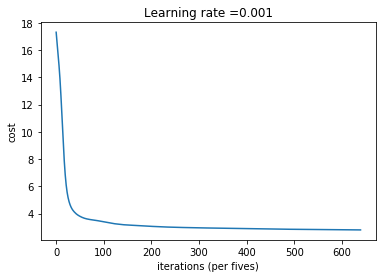

Parameters have been trained!
Train RMSE mean: 0.1321838
Test RMSE mean: 0.1343998


In [46]:
parameters = model(X_train, Y_train, X_test, Y_test)

In [57]:
yx=[]
for n in range(18):
    prediction = predict(X_test[:,n].reshape(5,1), parameters)
    prediction = sc_X.inverse_transform(prediction.transpose())
    y_test = sc_X.inverse_transform(((Y_test[:,n].reshape(10,1)).transpose()))
    y_diff = prediction - y_test
    y_perc = (abs(y_diff)*100)/y_test
    print(np.mean(y_perc))
    yx.append(np.mean(y_perc))
print(" ")
print(np.mean(np.array(yx)))

24.91389857359
40.57471023864011
10.457091397277186
9.961167134370616
17.608024613852557
24.715498963201252
19.521371980247586
21.236921878538055
30.53636657385497
8.71380064693454
18.7081639820732
15.655038095048628
21.226651008117464
15.309509502864406
16.364280610414724
18.50336774182822
28.304114235215742
9.368673871040793
 
19.537702835950558


In [65]:
from sklearn.metrics import mean_squared_error
y_pred = []
y_Test = []
for i in range(18):
    prediction = predict(X_test[:,n].reshape(5,1), parameters)
    prediction = sc_X.inverse_transform(prediction.transpose())
    y_test = sc_X.inverse_transform(((Y_test[:,n].reshape(10,1)).transpose()))
    y_pred.append(prediction)
    y_Test.append(y_test)
y_pred = np.array(y_pred).reshape(18,10)
y_Test = np.array(y_Test).reshape(18,10)
rmse = mean_squared_error( y_true = y_Test, y_pred = y_pred, multioutput = 'raw_values')**0.5
print('RMSE: %.10f  %.10f  %.10f  %.10f  %.10f  %.10f  %.10f  %.10f  %.10f  %.10f' % (rmse[0],rmse[1],rmse[2],rmse[3],rmse[4],rmse[5],rmse[6],rmse[7],rmse[8],rmse[9]))

RMSE: 0.0038394352  0.0028906530  0.0001216829  0.0039536854  0.0005660972  0.0000137364  0.0000295188  0.0000241315  0.0000101413  0.0000299543
